In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()


In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))


In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

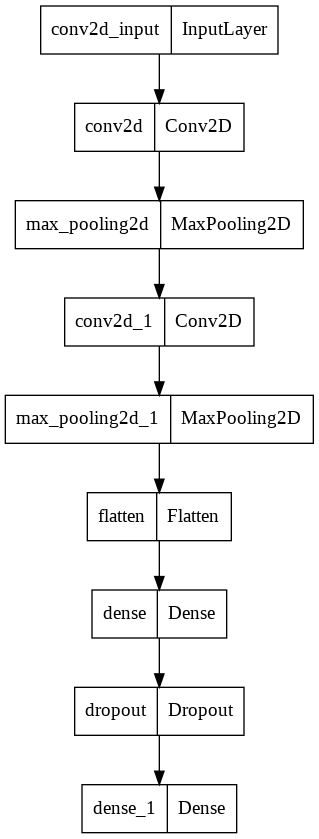

In [8]:
keras.utils.plot_model(model)

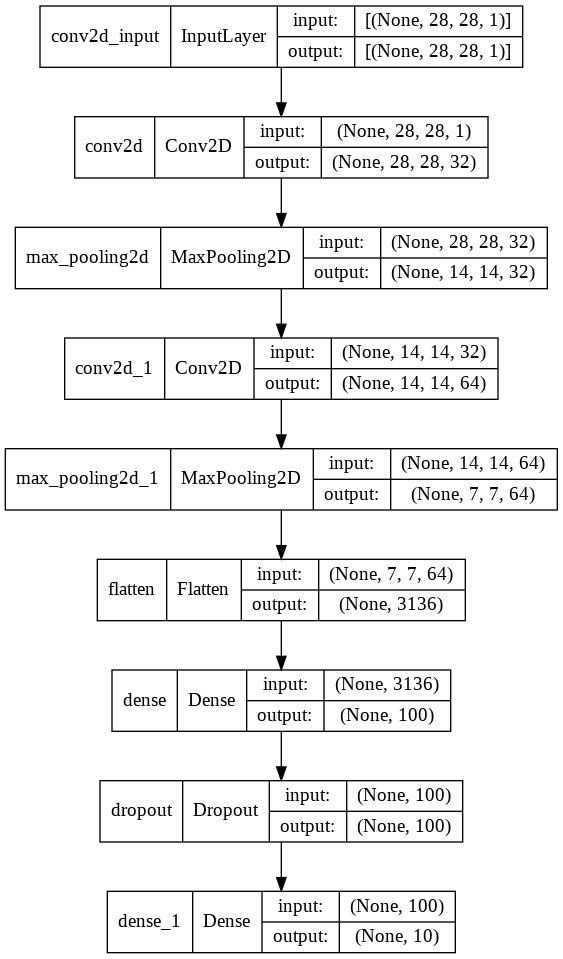

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.5413 - accuracy: 0.8055 - val_loss: 0.3418 - val_accuracy: 0.8740
Epoch 2/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.3579 - accuracy: 0.8724 - val_loss: 0.2925 - val_accuracy: 0.8920
Epoch 3/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.3065 - accuracy: 0.8891 - val_loss: 0.2753 - val_accuracy: 0.8972
Epoch 4/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.2730 - accuracy: 0.9012 - val_loss: 0.2473 - val_accuracy: 0.9087
Epoch 5/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2521 - accuracy: 0.9095 - val_loss: 0.2415 - val_accuracy: 0.9097
Epoch 6/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2284 - accuracy: 0.9160 - val_loss: 0.2462 - val_accuracy: 0.9098
Epoch 7/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2135 - accuracy: 0.9217 - val_loss: 0.2367 -

In [ ]:
import matplotlib.pyplot as plt

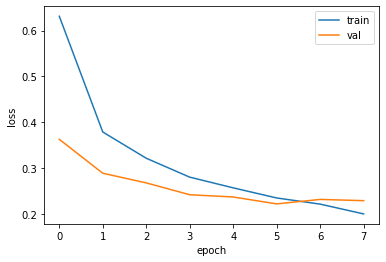

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 16ms/step - loss: 0.2218 - accuracy: 0.9211


[0.22184030711650848, 0.9210833311080933]

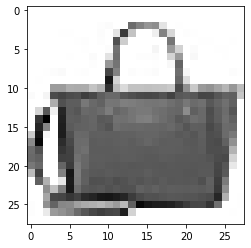

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.32801464e-20 1.23961935e-25 6.63022307e-25 4.76354644e-24
  9.91560343e-22 9.31665492e-23 1.45032178e-20 7.98757104e-26
  1.00000000e+00 3.93061937e-23]]


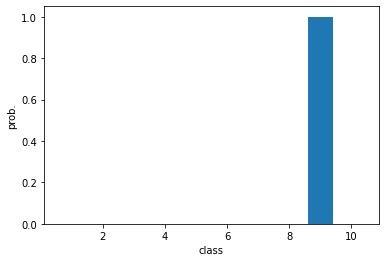

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
import numpy as np
print(np.argmax(preds))

8
